<a href="https://colab.research.google.com/github/jandyr/ProSeisSN/blob/main/fk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install obspy
import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from obspy import read
from obspy.signal.tf_misfit import cwt
from obspy import Stream, Trace
import numpy as np
from obspy import Stream
from scipy.fft import fft2, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


#st = read()
st = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(st)

t = st[0].stats.starttime
tr = st[0].trim(t , t + 60) 
print(tr)
del st

npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)
f_min = .01
f_max = 1


"""
st –> (time, s) signal
dt –> time step between two samples in st (in seconds)(s)
w0 –> wavelet tradeoff between time and frequency resolution 
fmin, fmax –> minimum, maximum frequency (Hz)
nf –> number of log-spaced frequencies between fmin and fmax
wl –> ‘morlet’ wavelet
      (st, dt, w0, fmin, fmax, nf=100, wl='morlet')
"""
scalogram = cwt(tr.data, dt, 8, f_min, f_max, nf=100)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)

In [ ]:
from __future__ import print_function

import obspy
from obspy.signal.cross_correlation import xcorr_pick_correction


# read example data of two small earthquakes
path = "https://examples.obspy.org/BW.UH1..EHZ.D.2010.147.%s.slist.gz"
st1 = obspy.read(path % ("a", ))
st2 = obspy.read(path % ("b", ))
# select the single traces to use in correlation.
# to avoid artifacts from preprocessing there should be some data left and
# right of the short time window actually used in the correlation.
tr1 = st1.select(component="Z")[0]
tr2 = st2.select(component="Z")[0]
# these are the original pick times set during routine analysis
t1 = obspy.UTCDateTime("2010-05-27T16:24:33.315000Z")
t2 = obspy.UTCDateTime("2010-05-27T16:27:30.585000Z")

# estimate the time correction for pick 2 without any preprocessing and open
# a plot window to visually validate the results
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True)
print("No preprocessing:")
print("  Time correction for pick 2: %.6f" % dt)
print("  Correlation coefficient: %.2f" % coeff)
# estimate the time correction with bandpass prefiltering
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True,
                                  filter="bandpass",
                                  filter_options={'freqmin': 1, 'freqmax': 10})
print("Bandpass prefiltering:")
print("  Time correction for pick 2: %.6f" % dt)
print("  Correlation coefficient: %.2f" % coeff)


5 Trace(s) in Stream:
.ST01..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:49.950000Z | 20.0 Hz, 1000 samples
.ST02..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:49.950000Z | 20.0 Hz, 1000 samples
.ST03..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:49.950000Z | 20.0 Hz, 1000 samples
.ST04..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:49.950000Z | 20.0 Hz, 1000 samples
.ST05..EHZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:49.950000Z | 20.0 Hz, 1000 samples


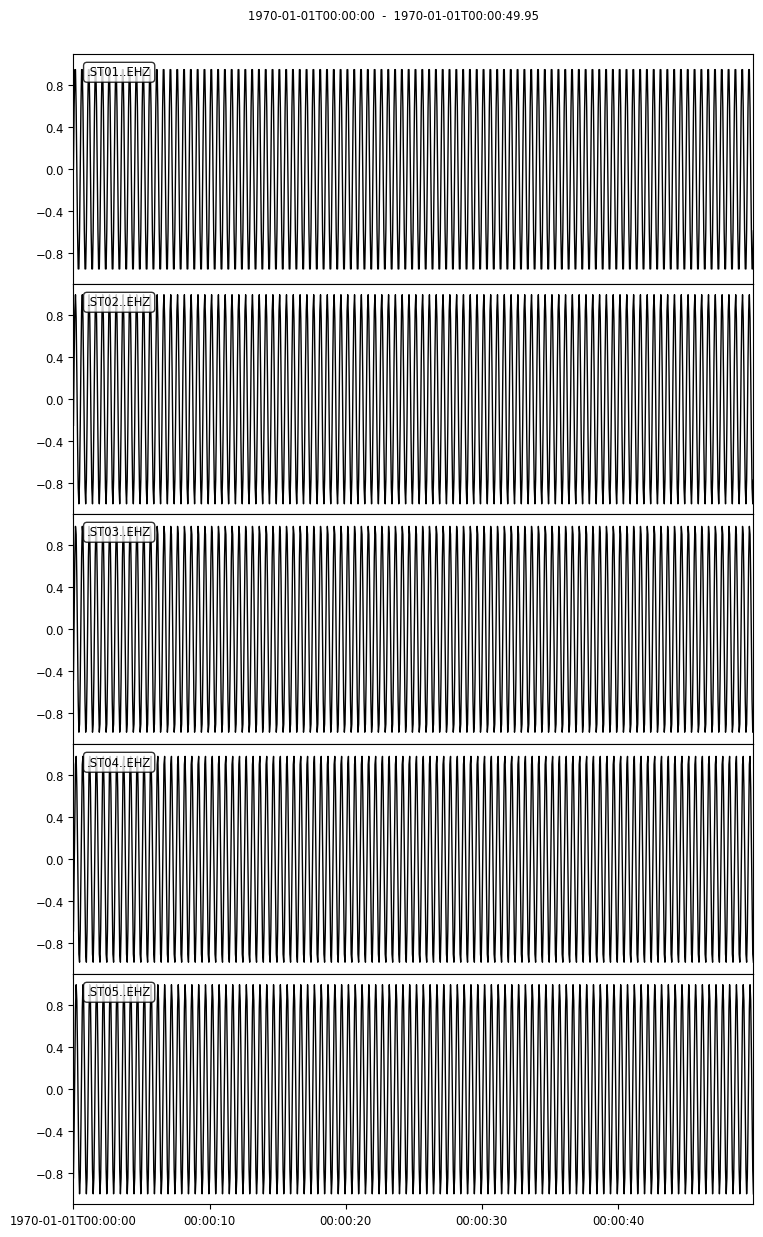

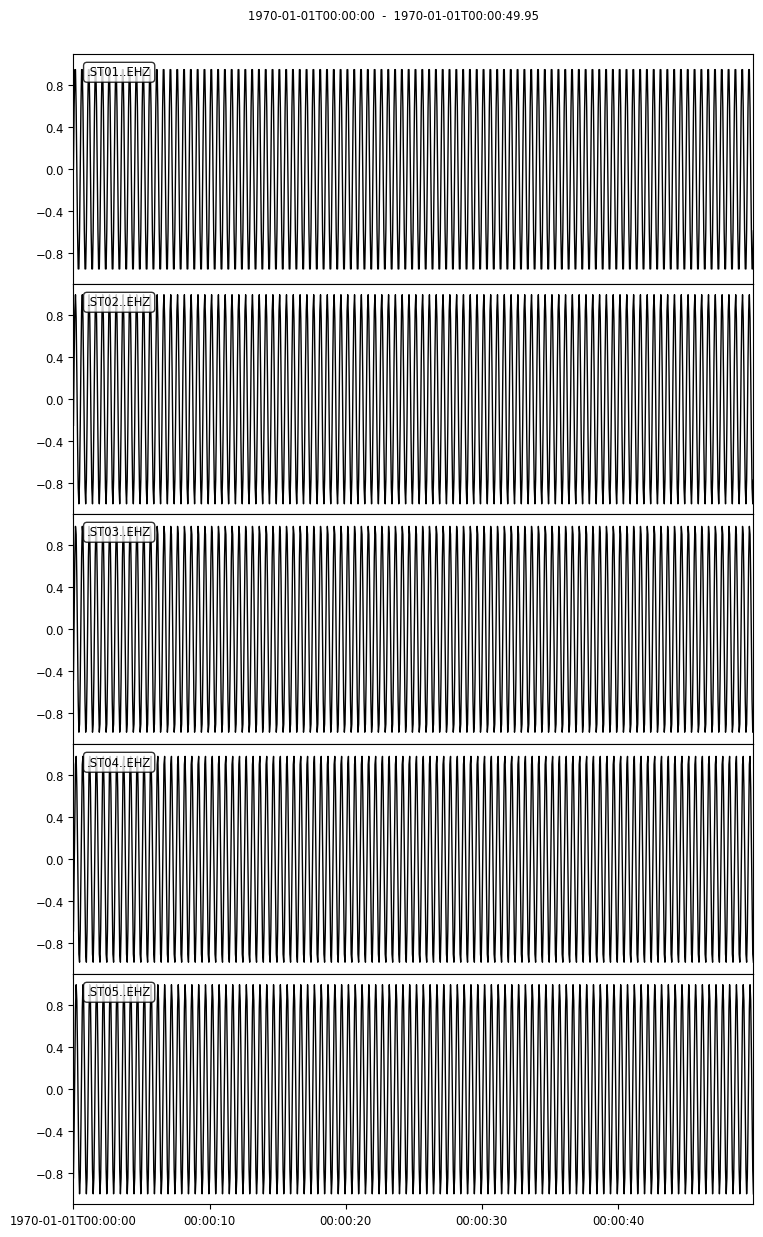

FK Spectrum Shape: (5, 1000)
Frequency Axis: [-10.    -9.98  -9.96  -9.94  -9.92  -9.9   -9.88  -9.86  -9.84  -9.82
  -9.8   -9.78  -9.76  -9.74  -9.72  -9.7   -9.68  -9.66  -9.64  -9.62
  -9.6   -9.58  -9.56  -9.54  -9.52  -9.5   -9.48  -9.46  -9.44  -9.42
  -9.4   -9.38  -9.36  -9.34  -9.32  -9.3   -9.28  -9.26  -9.24  -9.22
  -9.2   -9.18  -9.16  -9.14  -9.12  -9.1   -9.08  -9.06  -9.04  -9.02
  -9.    -8.98  -8.96  -8.94  -8.92  -8.9   -8.88  -8.86  -8.84  -8.82
  -8.8   -8.78  -8.76  -8.74  -8.72  -8.7   -8.68  -8.66  -8.64  -8.62
  -8.6   -8.58  -8.56  -8.54  -8.52  -8.5   -8.48  -8.46  -8.44  -8.42
  -8.4   -8.38  -8.36  -8.34  -8.32  -8.3   -8.28  -8.26  -8.24  -8.22
  -8.2   -8.18  -8.16  -8.14  -8.12  -8.1   -8.08  -8.06  -8.04  -8.02
  -8.    -7.98  -7.96  -7.94  -7.92  -7.9   -7.88  -7.86  -7.84  -7.82
  -7.8   -7.78  -7.76  -7.74  -7.72  -7.7   -7.68  -7.66  -7.64  -7.62
  -7.6   -7.58  -7.56  -7.54  -7.52  -7.5   -7.48  -7.46  -7.44  -7.42
  -7.4   -7.38  -7.36  -7.34  -7

In [5]:
def create_synthetic_stream(n_stations=5, n_samples=1000, sampling_rate=20.0, station_spacing=10.0, wave_velocity=500.0):
    """
    Create a synthetic ObsPy Stream with a linear array of stations and a propagating wave.

    Parameters:
    -----------
    n_stations : int
        Number of stations in the array.
    n_samples : int
        Number of samples in each trace.
    sampling_rate : float
        Sampling rate of the data in Hz.
    station_spacing : float
        Distance between stations in meters.
    wave_velocity : float
        Velocity of the wave propagation in m/s.

    Returns:
    --------
    stream : obspy.Stream
        A synthetic seismic stream with a propagating wave.
    """
    stream = Stream()
    time = np.linspace(0, (n_samples - 1) / sampling_rate, n_samples)
    frequency = 2.0  # Frequency of the wave in Hz

    for i in range(n_stations):
        # Create a sine wave with a delay based on station position
        station_position = i * station_spacing
        delay = station_position / wave_velocity
        data = np.sin(2 * np.pi * frequency * (time - delay))

        # Create a Trace and add metadata
        trace = Trace(data=data)
        trace.stats.sampling_rate = sampling_rate
        trace.stats.station = f"ST{str(i + 1).zfill(2)}"  # Station names: ST01, ST02, ...
        trace.stats.channel = "EHZ"
        trace.stats.starttime = 0

        # Add the trace to the stream
        stream.append(trace)

    return stream

# Example usage
if __name__ == "__main__":
    # Create a small synthetic stream
    synthetic_stream = create_synthetic_stream()
    print(synthetic_stream)

    # Plot the synthetic stream
    synthetic_stream.plot()


def stream_to_fk(stream: Stream, station_spacing: float, sampling_rate: float):
    """
    Transform an ObsPy Stream to the f-k domain.

    Parameters:
    -----------
    stream : obspy.Stream
        The input seismic stream with traces from an array of stations.
    station_spacing : float
        Distance between stations in meters.
    sampling_rate : float
        Sampling rate of the data in Hz.

    Returns:
    --------
    fk_spectrum : np.ndarray
        2D Fourier-transformed spectrum in the f-k domain.
    freqs : np.ndarray
        Frequency axis values (Hz).
    wavenumbers : np.ndarray
        Wavenumber axis values (1/m).
    """
    # Ensure the stream is sorted by station positions
    stream.sort(keys=['station'])
    
    # Gather data from traces and organize into a 2D array (stations x time)
    data = np.array([tr.data for tr in stream])
    
    # Get dimensions
    n_stations, n_time_samples = data.shape
    
    # Perform 2D Fourier Transform (time and station space)
    fk_spectrum = fft2(data)
    fk_spectrum = fftshift(fk_spectrum)  # Shift zero frequency to the center

    # Frequency axis
    freqs = np.fft.fftfreq(n_time_samples, d=1/sampling_rate)
    freqs = fftshift(freqs)  # Shift zero frequency to the center
    
    # Wavenumber axis
    wavenumbers = np.fft.fftfreq(n_stations, d=station_spacing)
    wavenumbers = fftshift(wavenumbers)  # Shift zero wavenumber to the center

    return fk_spectrum, freqs, wavenumbers

# Example usage
if __name__ == "__main__":
    from obspy.core import read

    # Read a seismic stream with multiple stations

    stream = create_synthetic_stream()

    # Plot the synthetic stream
    stream.plot()
    #stream = read("path_to_your_seismic_data.mseed")
    
    # Parameters
    station_spacing = 10.0  # meters
    sampling_rate = stream[0].stats.sampling_rate  # Hz
    
    # Transform to f-k domain
    fk_spectrum, freqs, wavenumbers = stream_to_fk(stream, station_spacing, sampling_rate)
    
    # Print the shapes of the outputs
    print(f"FK Spectrum Shape: {fk_spectrum.shape}")
    print(f"Frequency Axis: {freqs}")
    print(f"Wavenumber Axis: {wavenumbers}")
